/mnt/OpenFormat/python


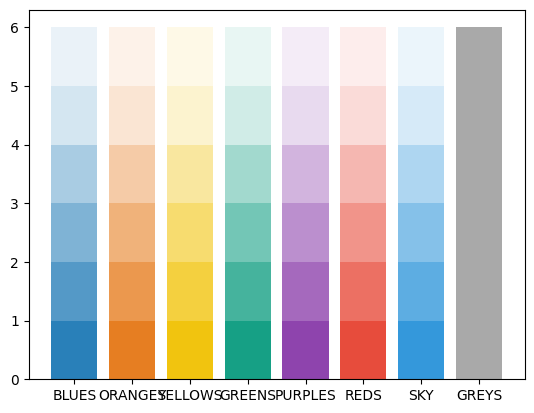

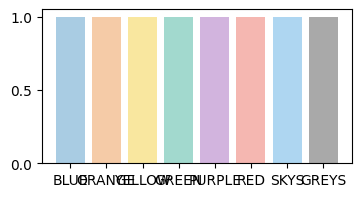

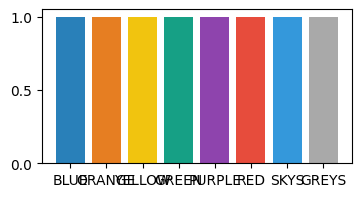

<Figure size 400x200 with 0 Axes>

In [1]:
import json
import os
import sys
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pathlib
import matplotlib
from stylelib import *
from process_helper import *
import style_hz as hz
_, grad_colors = display_colors()
_, bar_colors = select_color_idx(2)
_, line_colors = select_color_idx(5)

matplotlib.rcParams.update({'font.size': 14})
dir_path = pathlib.Path(os.path.abspath('')).parent.resolve()
print(dir_path)
HOME_DIR = str(dir_path).split('/OpenFormat')[0]
PROJ_SRC_DIR = f'{HOME_DIR}/OpenFormat'
sys.path.insert(1, f'{PROJ_SRC_DIR}')
from python.scripts.utils import *

# Bloom filter

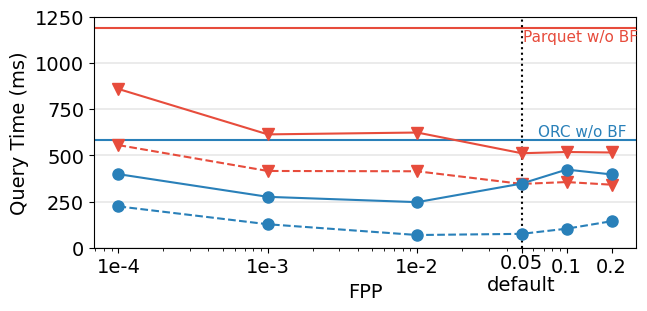

In [2]:
name = '../outputs/bf_.csv'
df = pd.read_csv(name) 
df = df[df['fpp'] <= 0.2]
df_avg = df.groupby(['format', 'fpp'], as_index=False).mean().set_index(['format'])
scale = ['linear']
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(df_avg.loc['parquet']['fpp'], df_avg.loc['parquet']['time'],color=line_colors[C_PQ],marker="v", label='Parquet',ls='-', ms=8)
ax.plot(df_avg.loc['parquet']['fpp'], df_avg.loc['parquet']['time_preload'],color=line_colors[C_PQ],marker="v", label='Parquet Preload',ls='--', ms=8)
ax.plot(df_avg.loc['orc']['fpp'], df_avg.loc['orc']['time'],color=line_colors[C_ORC],marker="o", label='ORC',ls='-', ms=8)
ax.plot(df_avg.loc['orc']['fpp'], df_avg.loc['orc']['time_preload'],color=line_colors[C_ORC],marker="o", label='ORC Preload',ls='--', ms=8)
ax.set_xscale('log')
ax.set_ylim(bottom=0)
legend=ax.legend(bbox_to_anchor=((1.08,1.2)),columnspacing=0.2, ncol=4, frameon=False, prop={'size': 11},markerscale=0.8)
export_legend(legend, '../figures/bf_legend.pdf')
legend.remove()
ax.set_xlabel('FPP')
ax.set_ylabel('Query Time (ms)')
ax.set_xticks([0.0001, 0.001, 0.01, 0.05, 0.1, 0.2], ['1e-4', '1e-3', '1e-2', '', '0.1', '0.2'])
# ax.set_xticklabels(['1e-4', '1e-3', '1e-2', '5e-2', '1e-1', '5e-1'])
# ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# plt.title(ds))
ax.set_axisbelow(True)
ax.grid(axis='y', linewidth=0.35)

ax.set_ylim(top=1250)
ax.axhline(y=1190, color=line_colors[C_PQ], linestyle='-', zorder=0.5)
ax.text(0.3, 1140, 'Parquet w/o BF', ha='right', va='center', color=line_colors[C_PQ], fontsize=11)
ax.axhline(y=581, color=line_colors[C_ORC], linestyle='-', zorder=0.5)
ax.text(0.25, 630, 'ORC w/o BF', ha='right', va='center', color=line_colors[C_ORC], fontsize=11)

# Add the vertical line
default_fpp = 0.05
ax.axvline(default_fpp, color="black", linestyle="dotted", zorder=1)
ax.text(default_fpp, -31, "0.05\ndefault", fontsize=14, color="black", ha="center", va="top")

plt.savefig(f'../figures/bf_time.pdf', bbox_inches='tight')
plt.show()

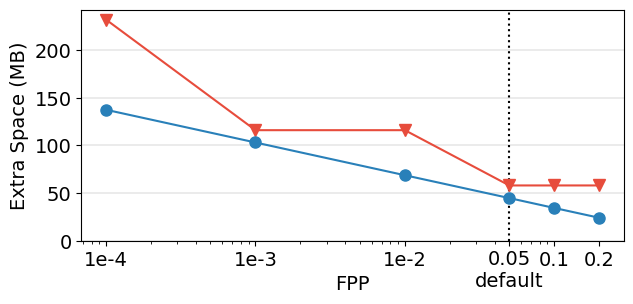

In [3]:
fig, ax = plt.subplots(figsize=(7, 3))
MB_divider = 1024*1024
ax.plot(df_avg.loc['parquet']['fpp'], df_avg.loc['parquet']['extra_size']/MB_divider,color=line_colors[C_PQ],marker="v", label='Parquet',ls='-', ms=8)
ax.plot(df_avg.loc['orc']['fpp'], df_avg.loc['orc']['extra_size']/MB_divider,color=line_colors[C_ORC],marker="o", label='ORC',ls='-', ms=8)
ax.set_xscale('log')
ax.set_ylim(bottom=0)
# ax.legend(columnspacing=0.5, ncol=4, frameon=True, fontsize=11)
ax.set_xlabel('FPP')
ax.set_ylabel('Extra Space (MB)')
ax.set_xticks([0.0001, 0.001, 0.01, 0.05, 0.1, 0.2], ['1e-4', '1e-3', '1e-2', '', '0.1', '0.2'])
# plt.title(ds)
# fig.tight_layout(rect=[0,0,1,1]) 
ax.set_axisbelow(True)
ax.grid(axis='y', linewidth=0.35)
# Add the vertical line
default_fpp = 0.05
ax.axvline(default_fpp, color="black", linestyle="dotted", zorder=1)
ax.text(default_fpp, -9.5, "0.05\ndefault", fontsize=14, color="black", ha="center", va="top")

plt.savefig(f'../figures/bf_space.pdf', bbox_inches='tight')
plt.show()